In [5]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import os.path
import os
from zipfile import ZipFile

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_name="/content/drive/MyDrive/xray_dataset_covid19.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Classes:  ['NORMAL', 'PNEUMONIA']
Image Shape:  (2224, 2446, 3)


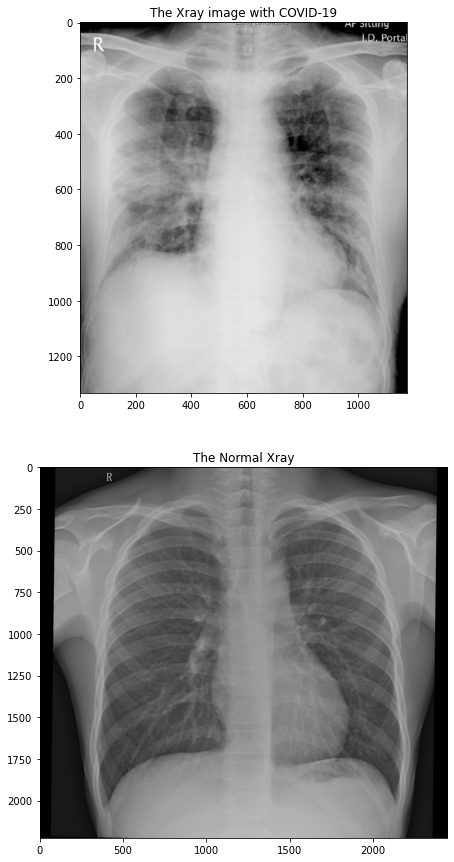

In [4]:
pnem="/content/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg"
normal="/content/test/NORMAL/NORMAL2-IM-0052-0001.jpeg"
def sample_images(pnemonia,normal):
  print("Classes: ",os.listdir('/content/train'))
  NORMAL_img=image.load_img(normal)
  PNEUMONIA_img=image.load_img(pnemonia)
  fig, axs = plt.subplots(2,figsize=(10,15))
  axs[0].imshow(PNEUMONIA_img)
  axs[0].set_title('The Xray image with COVID-19')
  axs[1].imshow(NORMAL_img)
  axs[1].set_title('The Normal Xray')
  print("Image Shape: ",cv2.imread(normal).shape)
sample_images(pnem,normal)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Train data class indices:  {'NORMAL': 0, 'PNEUMONIA': 1}
Epoch 1/20
3/3 [==============================] - 3s 931ms/step - loss: 1.9326 - accuracy: 0.6000 - val_loss: 0.5609 - val_accuracy: 0.7500
Epoch 2/20
3/3 [==============================] - 2s 902ms/step - loss: 3.1324 - accuracy: 0.5000 - val_loss: 2.0973 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 2s 967ms/step - loss: 1.3961 - accuracy: 0.4667 - val_loss: 0.6281 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 2s 947ms/step - loss: 0.8579 - accuracy: 0.5000 - val_loss: 0.6302 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 2s 903ms/step - loss: 0.7571 - accuracy: 0.4333 - val_loss: 0.6585 - val_accuracy: 0.6750
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 0.6908 - accuracy: 0.5000 - val_loss: 0.6619 - val_accuracy: 0.5000
Epoch 7/20
3/3 [=========

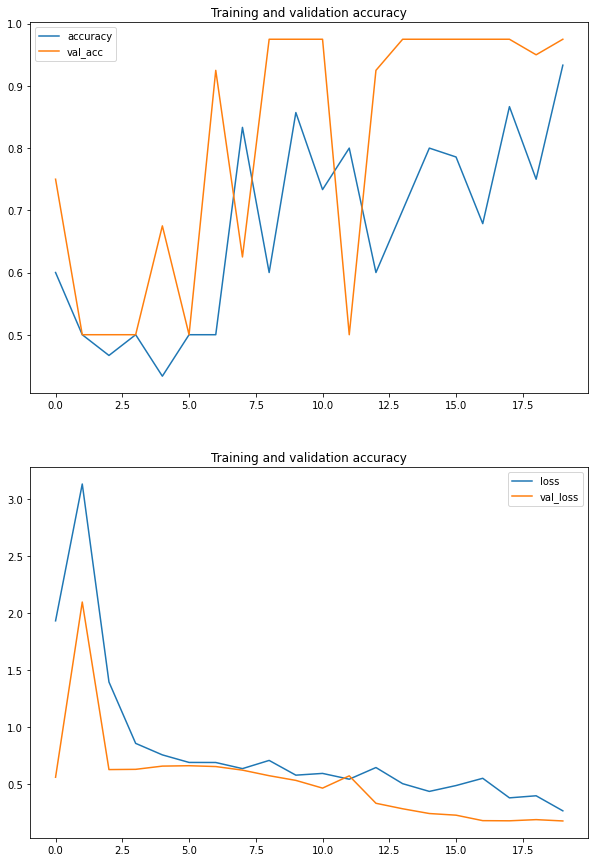

In [10]:
train_path="/content/train"
test_path="/content/test"

def train_model(train,valid):
  datagen=ImageDataGenerator(rotation_range=20, width_shift_range=0.10, height_shift_range=0.10, rescale=1/255, shear_range=0.1,
                               zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')
  
  train_data=datagen.flow_from_directory(train,target_size=(200,200),batch_size=10,class_mode='binary')
  validation_data=datagen.flow_from_directory(valid,target_size=(200,200),batch_size=10,class_mode='binary')
  print("Train data class indices: ",train_data.class_indices)

  model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(200,200,3)) ,
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dropout(0.25),
                                 tf.keras.layers.Dense(256,activation='relu'),
                                 tf.keras.layers.Dropout(0.25),
                                 tf.keras.layers.Dense(1,activation='sigmoid')])
  
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  
  
  r=model.fit(train_data,steps_per_epoch=3,epochs=20,validation_data=validation_data)
  
  def accuracy_loss(r):
    fig, axs = plt.subplots(2,figsize=(10,15))
    axs[0].plot(r.history['accuracy'],label='accuracy')
    axs[0].plot(r.history['val_accuracy'],label='val_acc')
    axs[0].set_title("Training and validation accuracy")
    axs[0].legend()

    axs[1].plot(r.history['loss'],label='loss')
    axs[1].plot(r.history['val_loss'],label='val_loss')
    axs[1].set_title("Training and validation accuracy")
    axs[1].legend()
  accuracy_loss(r)
  

  if os.path.isfile('/content/xraycorona.h5') is False:
    model.save('/content/xraycorona.h5')
  print(model.summary())
  return r
train_model(train_path,test_path)

In [12]:
model = tf.keras.models.load_model('/content/xraycorona.h5')

In [ ]:
# dir_path="D:/CODING/DataSeTs/xray_dataset_covid19/test/mixed"
# def detect_many(dir):
#   for i in os.listdir(dir_path):
#     img=image.load_img(dir_path+'//'+i,target_size=(200,200))
#     plt.imshow(img)
#     plt.show()
    
#     X=image.img_to_array(img)
#     X=np.expand_dims(X,axis=0)
#     images=np.vstack([X])
#     test=model.predict(images)

#     if test==0:
#         print("Negetive")
#     else:
#         print("Positive")

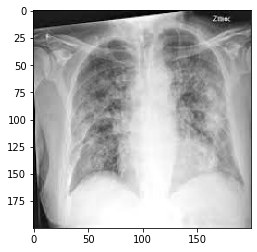

1/1 [==============================] - 0s 19ms/step
Positive


In [14]:
img_path="/content/test-image.jpg"
def detect_single(dir):
  img=image.load_img(dir,target_size=(200,200))
  plt.imshow(img)
  plt.show()
  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  test=model.predict(X)
  if test==0:
    print("Negetive")
  else:
    print("Positive")
detect_single(img_path)